In [1]:
using HarmonicBalance
@variables α, ω, ω0, F, t, η, x(t), γ; # declare constant variables and a function x(t)

In [2]:
# define ODE
diff_eq = DifferentialEquation(d(x,t,2) + ω0^2*x + α*x^3 + 0*η*d(x,t)*x^2+ γ*d(x,t) ~ F*cos(ω*t), x)

# specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)
add_harmonic!(diff_eq, x, ω) 

System of 1 differential equations
Variables:       x(t)
Harmonic ansatz: x(t) => ω;   

α*(x(t)^3) + (ω0^2)*x(t) + γ*Differential(t)(x(t)) + Differential(t)(Differential(t)(x(t))) ~ F*cos(t*ω)


In [3]:
# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: α, ω, γ, ω0, F

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)

Harmonic equations:

γ*Differential(T)(u1(T)) + (ω0^2)*u1(T) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^2)*u1(T) - (ω^2)*u1(T) ~ F

(ω0^2)*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^3) + (3//4)*α*(u1(T)^2)*v1(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - γ*ω*u1(T) ~ 0


# drive near resonance

In [4]:
fixed = (α => 1., ω0 => 1.0, F => 0.01, γ=>0.0001)   # fixed parameters
swept = ω => LinRange(0.9, 1.2, 100)              # range of parameter values
solutions = get_steady_states(harmonic_eq, swept, fixed)

Solving via total degree homotopy ... 100%|██████████████████████████████████████████████████| Time: 0:00:48


A steady state result for 100 parameter points

Solution branches:   3
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


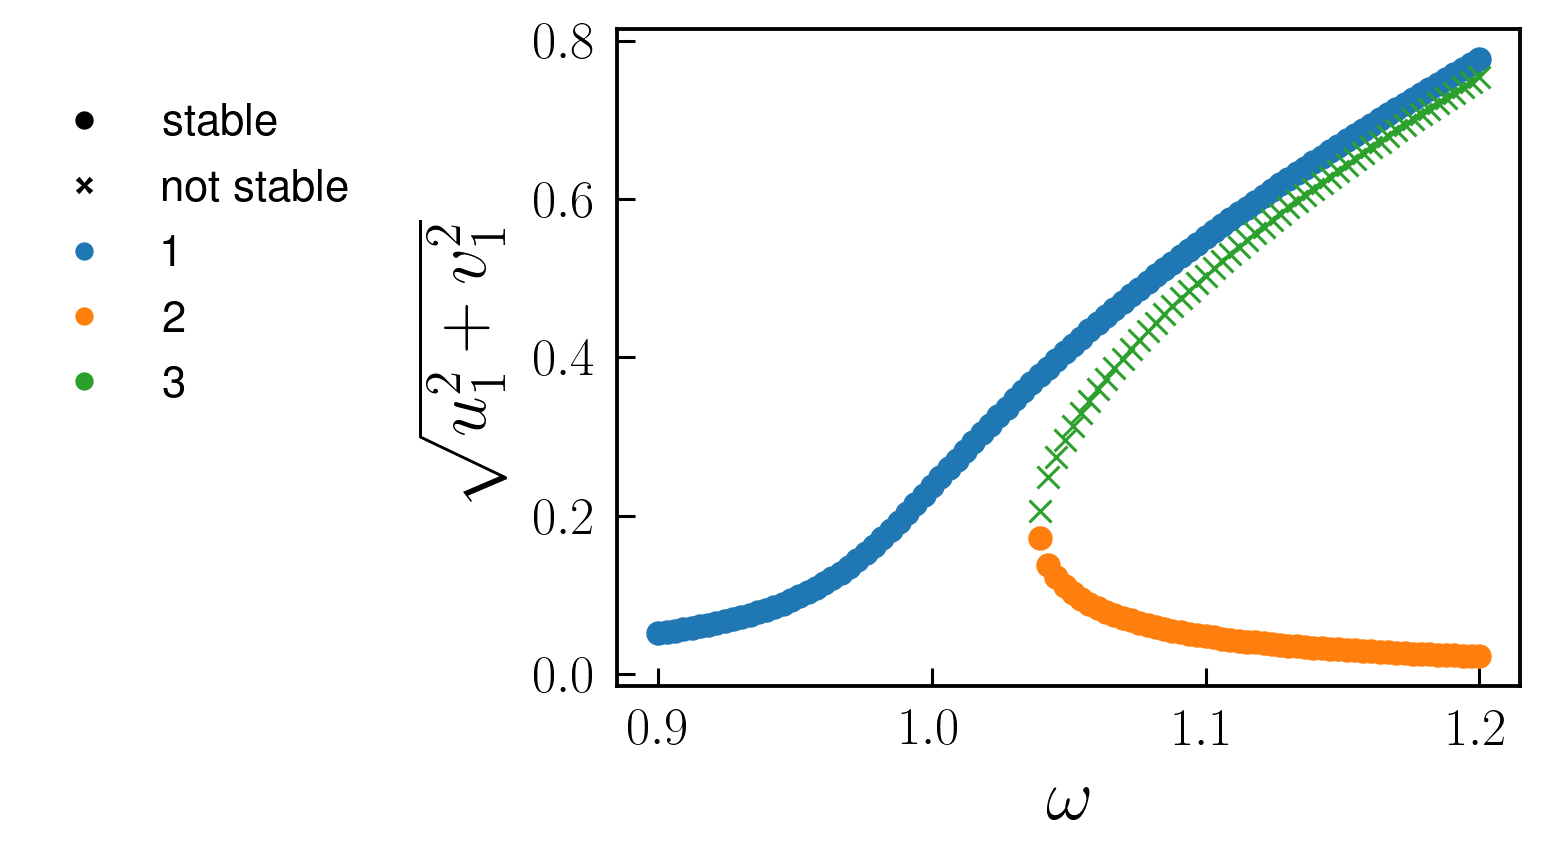

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/hrochan/.julia/packages/PyCall/L0fLP/src/numpy.jl:67
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [5]:
plot(solutions, x="ω", y="sqrt(u1^2 + v1^2)");

# drive around ω0/3, expand in both ω and 3ω

    drive at ω:       off-resonant
    upconverted 3ω:   resonant!

In [6]:
# specify the two-harmonics ansatz
add_harmonic!(diff_eq, x, [ω, 3ω]) 
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 4 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T)
Parameters: ω, ω0, α, γ, F

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt) + u2(T)*cos(3ωt) + v2(T)*sin(3ωt)

Harmonic equations:

(ω0^2)*u1(T) + γ*Differential(T)(u1(T)) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//2)*α*(u2(T)^2)*u1(T) + (3//4)*α*(u1(T)^2)*u2(T) + (3//4)*α*(v1(T)^2)*u1(T) + (3//2)*α*(v2(T)^2)*u1(T) + (3//2)*α*u1(T)*v1(T)*v2(T) - (ω^2)*u1(T) - (3//4)*α*(v1(T)^2)*u2(T) ~ F

γ*Differential(T)(v1(T)) + (ω0^2)*v1(T) + (3//4)*α*(v1(T)^3) + (3//4)*α*(u1(T)^2)*v1(T) + (3//2)*α*(u2(T)^2)*v1(T) + (3//2)*α*(v2(T)^2)*v1(T) + (3//4)*α*(u1(T)^2)*v2(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - γ*ω*u1(T) - (3//4)*α*(v1(T)^2)*v2(T) - (3//2)*α*u1(T)*u2(T)*v1(T) ~ 0

(ω0^2)*u2(T) + γ*Differential(T)(u2(T)) + (1//4)*α*(u1(T)^3) + (3//4)*α*(u2(T)^3) + (6//1)*ω*Differential(T)(v2(T)) + (3//2)*α*(u1(T)^2)*u2(T) + (3//4)*α*(v2(T)^2)*u2(T) + (3//2)*α*(v1(T)^2)*u2(T) + (3//1)*γ*ω*v2(

In [7]:
fixed = (α => 10., ω0 => 3, F => 5, γ=>0.01)   # fixed parameters
swept = ω => LinRange(0.9, 1.4, 200)           # range of parameter values
solutions = get_steady_states(harmonic_eq, swept, fixed)

Solving via total degree homotopy ... 100%|██████████████████████████████████████████████████| Time: 0:00:17


A steady state result for 200 parameter points

Solution branches:   9
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


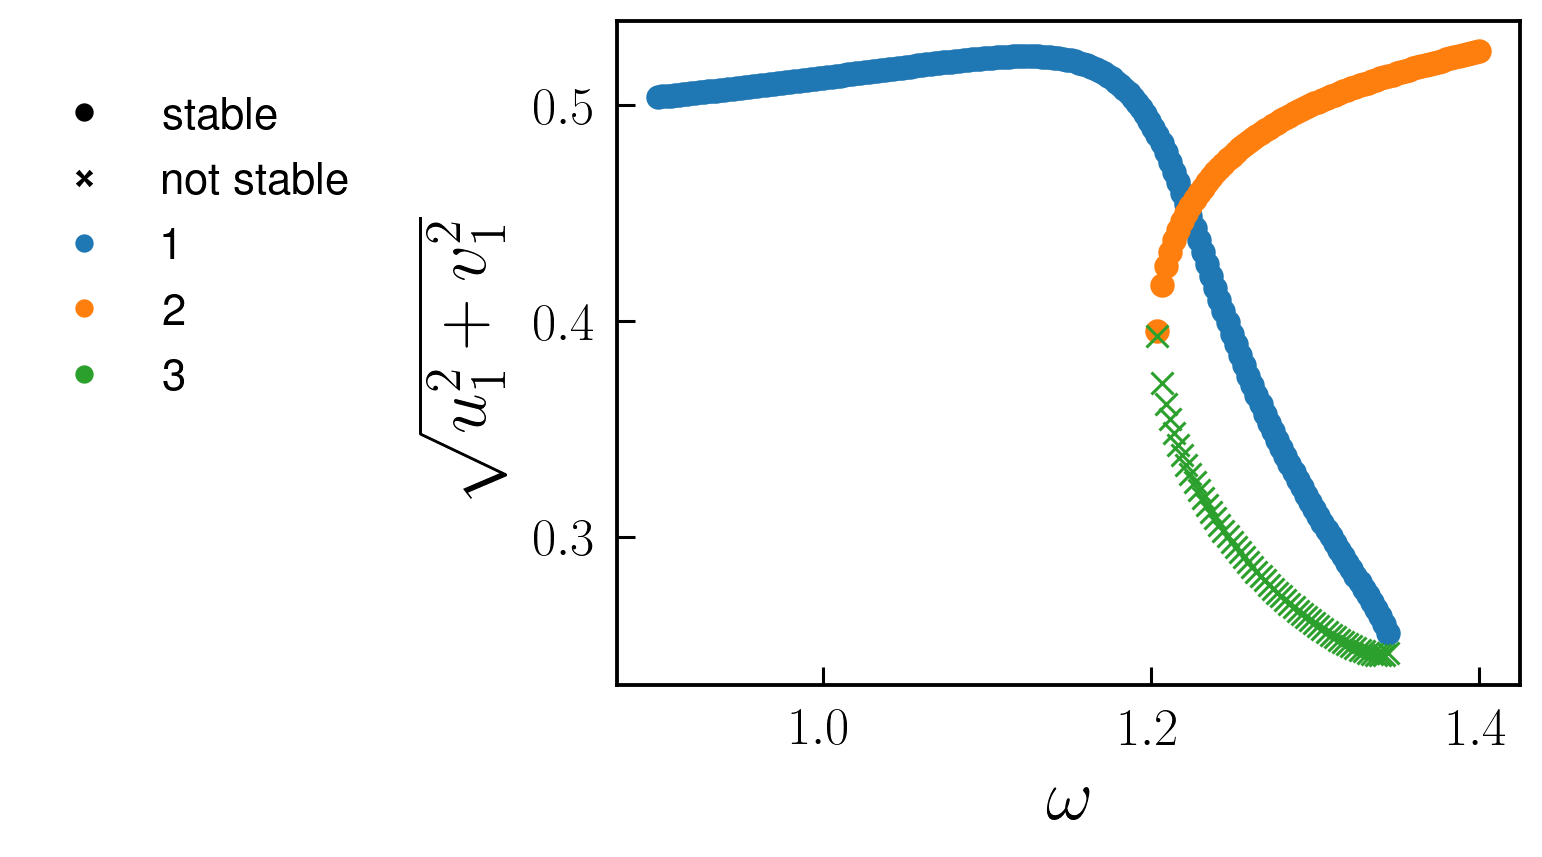

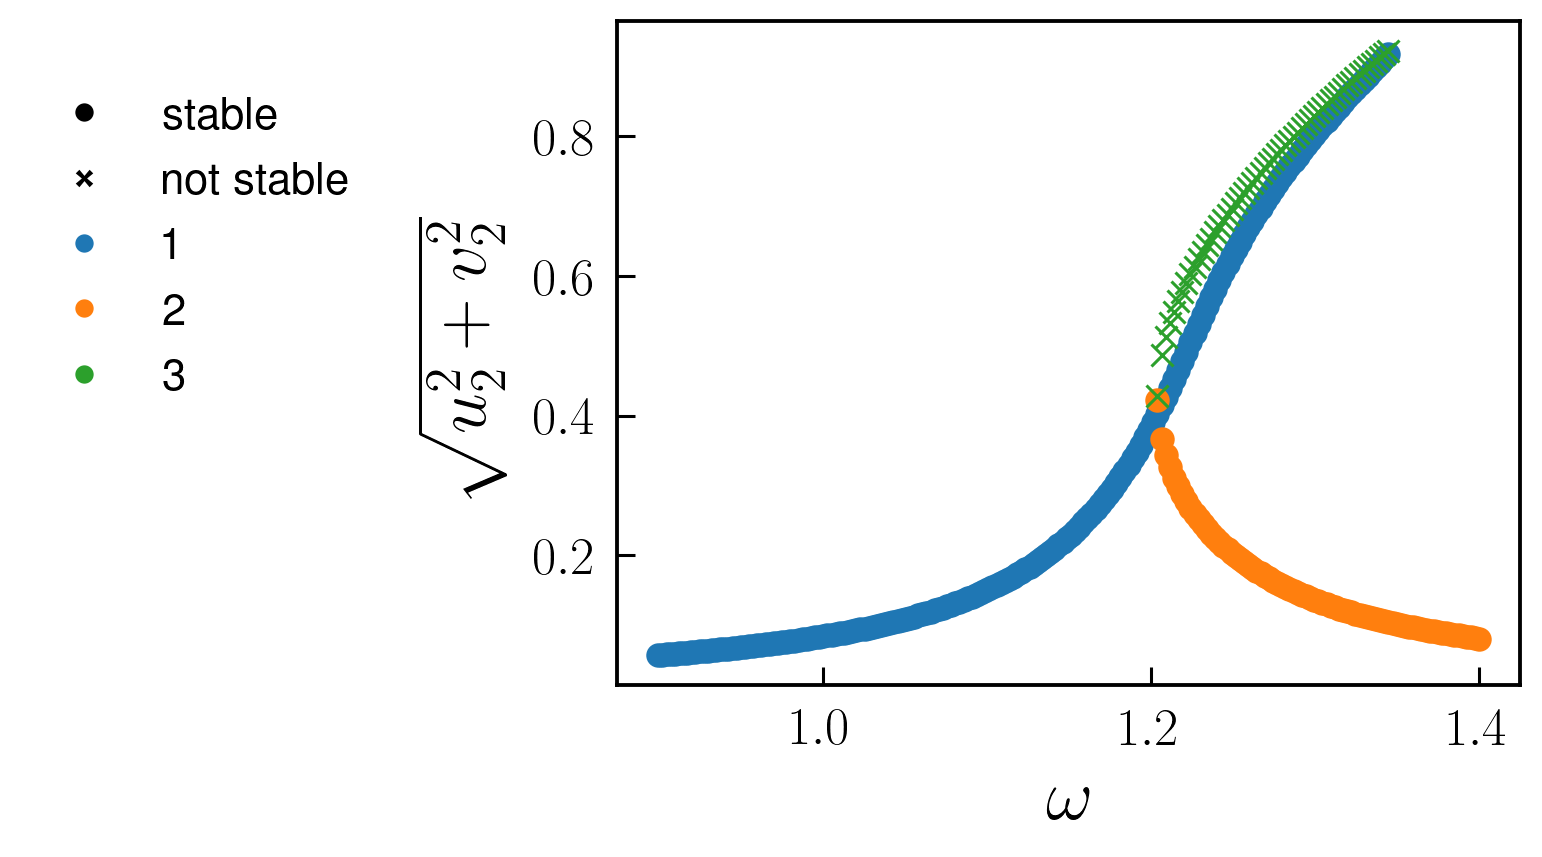

In [8]:
plot(solutions, x="ω", y="sqrt(u1^2 + v1^2)");
plot(solutions, x="ω", y="sqrt(u2^2 + v2^2)");